In [1]:
from asgardpy.analysis import AsgardpyAnalysis
from asgardpy.config import AsgardpyConfig
from gammapy.modeling.models import Models
from gammapy.maps import Map
from gammapy.data import DataStore
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
import logging

In [2]:
from asgardpy.data.dataset_1d import Dataset1DGeneration
from asgardpy.io.io import DL3Files

In [3]:
log = logging.getLogger("test 1d dataset")

In [4]:
base_dir = "/fefs/aswg/workspace/chaitanya.priyadarshi/"
config_file = base_dir + "analyze_pg1553_full.yaml"
output_dir = base_dir + "real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/joint_fit/"

In [5]:
config = AsgardpyConfig()

In [6]:
%%time
config_main = config.read(config_file)

CPU times: user 33.8 ms, sys: 4.53 ms, total: 38.3 ms
Wall time: 36.5 ms


In [7]:
for g in config_main.general:
    print(g)

('log', LogConfig(level='info', filename=None, filemode=None, format=None, datefmt=None))
('outdir', '/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/joint_fit/')
('n_jobs', 1)
('steps', [<AnalysisStepEnum.datasets_3d: 'datasets-3d'>, <AnalysisStepEnum.datasets_1d: 'datasets-1d'>, <AnalysisStepEnum.fit: 'fit'>, <AnalysisStepEnum.flux_points: 'flux-points'>])
('overwrite', True)
('stacked_dataset', True)


# Steps mentioned in the main config file

In [8]:
config_main.general.steps

[<AnalysisStepEnum.datasets_3d: 'datasets-3d'>,
 <AnalysisStepEnum.datasets_1d: 'datasets-1d'>,
 <AnalysisStepEnum.fit: 'fit'>,
 <AnalysisStepEnum.flux_points: 'flux-points'>]

# Target source information

In [9]:
for c in config_main.target:
    print(c)

('source_name', 'PG1553+113')
('sky_position', SkyCoordConfig(frame=<FrameEnum.icrs: 'icrs'>, lon=<Angle 238.92934976 deg>, lat=<Angle 11.19010155 deg>))
('use_uniform_position', True)
('models_file', None)
('extended', False)
('components', SkyModelComponent(name='PG1553+113', type='SkyModel', spectral=SpectralModelConfig(model_name='LogParabola', type='LogParabolaSpectralModel', parameters=[ModelParams(name='amplitude', value=1e-05, unit='cm-2 s-1 TeV-1', error=1.5e-06, min=1e-13, max=0.01, frozen=False), ModelParams(name='reference', value=0.0015, unit='TeV', error=0.0, min=0.0001, max=100.0, frozen=True), ModelParams(name='alpha', value=1.5, unit='', error=0.1, min=0.5, max=5.0, frozen=False), ModelParams(name='beta', value=0.1, unit='', error=0.01, min=1e-06, max=1.0, frozen=False)], ebl_abs=EBLAbsorptionModel(model_name='dominguez', type='EBLAbsorptionNormSpectralModel', redshift=0.433, alpha_norm=1.0)), spatial=SpatialModelConfig(model_name=None, type=None, parameters=[ModelPara

# 1D Datasets informations

In [10]:
for cc in config_main.dataset1d:
    print(cc)

('type', <ReductionTypeEnum.spectrum: '1d'>)
('instruments', [Dataset1DBaseConfig(name='LST-1', io=[InputConfig(type='lst-1', input_dir=PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931'), glob_pattern={'dl3': '202*/dl3*fits'})], dataset_info=Dataset1DInfoConfig(name='LST-1', geom=GeomConfig(wcs=WcsConfig(skydir=SkyCoordConfig(frame=None, lon=None, lat=None), binsize=<Angle 0.02 deg>, final_frame=FinalFrameConfig(width=<Angle 5. deg>, height=<Angle 5. deg>), binsize_irf=<Angle 0.2 deg>), selection=SelectionConfig(offset_max=<Angle 2.5 deg>), axes=EnergyAxesConfig(energy=EnergyAxisConfig(min=<Quantity 10. GeV>, max=<Quantity 10. TeV>, nbins=5), energy_true=EnergyAxisConfig(min=<Quantity 10. GeV>, max=<Quantity 10. TeV>, nbins=5))), observation=ObservationsConfig(obs_ids=[], obs_file=None, obs_time=TimeIntervalsConfig(format=<TimeFormatEnum.iso: 'iso'>, intervals=[TimeRangeConfig(start

In [11]:
%%time
analysis = AsgardpyAnalysis(config_main)

Setting logging config: {'level': 'INFO', 'filename': None, 'filemode': None, 'format': None, 'datefmt': None}


CPU times: user 1.92 ms, sys: 0 ns, total: 1.92 ms
Wall time: 1.63 ms


In [12]:
analysis

# Prepare for a single 1D Dataset, based on instrument

In [13]:
instruments_list = config_main.dataset1d.instruments
print(len(instruments_list), "number of 1D dataset information provided")

config_1d_dataset = instruments_list[0]
print(f"Instrument selected is {config_1d_dataset.name}")

1 number of 1D dataset information provided
Instrument selected is LST-1


# Run each Dataset1DGeneration step

In [14]:
%%time
generate_1d_dataset = Dataset1DGeneration(
    log, config_1d_dataset, config_main.target
)

CPU times: user 12 µs, sys: 15 µs, total: 27 µs
Wall time: 33.9 µs


# Initialized variables

In [15]:
print(generate_1d_dataset.config_1d_dataset_io)

[InputConfig(type='lst-1', input_dir=PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931'), glob_pattern={'dl3': '202*/dl3*fits'})]


In [16]:
print(generate_1d_dataset.config_1d_dataset_info)

name='LST-1' geom=GeomConfig(wcs=WcsConfig(skydir=SkyCoordConfig(frame=None, lon=None, lat=None), binsize=<Angle 0.02 deg>, final_frame=FinalFrameConfig(width=<Angle 5. deg>, height=<Angle 5. deg>), binsize_irf=<Angle 0.2 deg>), selection=SelectionConfig(offset_max=<Angle 2.5 deg>), axes=EnergyAxesConfig(energy=EnergyAxisConfig(min=<Quantity 10. GeV>, max=<Quantity 10. TeV>, nbins=5), energy_true=EnergyAxisConfig(min=<Quantity 10. GeV>, max=<Quantity 10. TeV>, nbins=5))) observation=ObservationsConfig(obs_ids=[], obs_file=None, obs_time=TimeIntervalsConfig(format=<TimeFormatEnum.iso: 'iso'>, intervals=[TimeRangeConfig(start=<Time object: scale='utc' format='iso' value=2021-04-01 00:00:00.000>, stop=<Time object: scale='utc' format='iso' value=2022-05-25 00:00:00.000>)]), required_irfs=[<RequiredHDUEnum.aeff: 'aeff'>, <RequiredHDUEnum.edisp: 'edisp'>, <RequiredHDUEnum.rad_max: 'rad_max'>]) background=BackgroundConfig(method=<BackgroundMethodEnum.reflected: 'reflected'>, region_finder_me

In [17]:
print(generate_1d_dataset.config_target)

source_name='PG1553+113' sky_position=SkyCoordConfig(frame=<FrameEnum.icrs: 'icrs'>, lon=<Angle 238.92934976 deg>, lat=<Angle 11.19010155 deg>) use_uniform_position=True models_file=None extended=False components=SkyModelComponent(name='PG1553+113', type='SkyModel', spectral=SpectralModelConfig(model_name='LogParabola', type='LogParabolaSpectralModel', parameters=[ModelParams(name='amplitude', value=1e-05, unit='cm-2 s-1 TeV-1', error=1.5e-06, min=1e-13, max=0.01, frozen=False), ModelParams(name='reference', value=0.0015, unit='TeV', error=0.0, min=0.0001, max=100.0, frozen=True), ModelParams(name='alpha', value=1.5, unit='', error=0.1, min=0.5, max=5.0, frozen=False), ModelParams(name='beta', value=0.1, unit='', error=0.01, min=1e-06, max=1.0, frozen=False)], ebl_abs=EBLAbsorptionModel(model_name='dominguez', type='EBLAbsorptionNormSpectralModel', redshift=0.433, alpha_norm=1.0)), spatial=SpatialModelConfig(model_name=None, type=None, parameters=[ModelParams(name=None, value=None, uni

In [18]:
print(generate_1d_dataset.dl3_dir_dict)

type='lst-1' input_dir=PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931') glob_pattern={'dl3': '202*/dl3*fits'}


In [19]:
print(generate_1d_dataset.model)

model_name='LogParabola' type='LogParabolaSpectralModel' parameters=[ModelParams(name='amplitude', value=1e-05, unit='cm-2 s-1 TeV-1', error=1.5e-06, min=1e-13, max=0.01, frozen=False), ModelParams(name='reference', value=0.0015, unit='TeV', error=0.0, min=0.0001, max=100.0, frozen=True), ModelParams(name='alpha', value=1.5, unit='', error=0.1, min=0.5, max=5.0, frozen=False), ModelParams(name='beta', value=0.1, unit='', error=0.01, min=1e-06, max=1.0, frozen=False)] ebl_abs=EBLAbsorptionModel(model_name='dominguez', type='EBLAbsorptionNormSpectralModel', redshift=0.433, alpha_norm=1.0)


### First check for the given file list if they are readable or not.

In [20]:
%%time
file_list = {}
dl3_info = DL3Files(
    generate_1d_dataset.dl3_dir_dict, 
    generate_1d_dataset.model, 
    file_list, 
    log=generate_1d_dataset.log
)

CPU times: user 0 ns, sys: 869 µs, total: 869 µs
Wall time: 1.14 ms


In [21]:
dl3_info

In [22]:
%%time
dl3_info.list_dl3_files()

The list of DL3 files for LST-1 selected: [PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/20210407/dl3_LST-1.Run04333.fits'), PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/20210407/dl3_LST-1.Run04334.fits'), PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/20210407/dl3_LST-1.Run04335.fits'), PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/20210407/dl3_LST-1.Run04336.fits'), PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/20210408/dl3_LST-1.Run04343.fits'), PosixPa

CPU times: user 3.85 ms, sys: 7.84 ms, total: 11.7 ms
Wall time: 14.4 ms


In [23]:
print(f"Reading from {len(dl3_info.event_files)} DL3 files")
for e in dl3_info.event_files:
    print(e)

Reading from 48 DL3 files
/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/20210407/dl3_LST-1.Run04333.fits
/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/20210407/dl3_LST-1.Run04334.fits
/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/20210407/dl3_LST-1.Run04335.fits
/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/20210407/dl3_LST-1.Run04336.fits
/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_en_dep/no_tuning/geff_80/teff_80/20220511_dec931/20210408/dl3_LST-1.Run04343.fits
/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/PG1553/v09x/tailcut84/DL3/interp_irf_

## Get Observations object

In [24]:
generate_1d_dataset.datastore = DataStore.from_dir(generate_1d_dataset.dl3_dir_dict.input_dir)

In [25]:
generate_1d_dataset.datastore.obs_table

OBS_ID,DATE-OBS,TIME-OBS,DATE-END,TIME-END,RA_PNT,DEC_PNT,ZEN_PNT,ALT_PNT,AZ_PNT,RA_OBJ,DEC_OBJ,TSTART,TSTOP,ONTIME,TELAPSE,LIVETIME,DEADC,OBJECT,OBS_MODE,N_TELS,TELLIST,INSTRUME
,,,,,deg,deg,deg,deg,deg,deg,deg,s,s,s,s,s,,,,,,
int64,bytes10,bytes12,bytes10,bytes12,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes10,bytes8,int64,bytes5,bytes5
4333,2021-04-08,04:15:56.525,2021-04-08,04:36:00.803,239.3390457568525,11.19145759350709,18.418030013080468,71.58196998691953,197.5038774385736,238.9293333,11.1900833,79503356.52505589,79504560.80338001,1203.278080463409,1204.278324127197,1142.331268666289,0.9493493542459875,PG1553+113,POINTING,1,LST-1,LST-1
4334,2021-04-08,04:38:01.409,2021-04-08,04:57:57.949,238.5271449707135,11.2017436897964,20.955156078579833,69.04484392142017,214.9667070046245,238.9293333,11.1900833,79504681.4087193,79505877.94902134,1195.54092001915,1196.540302038193,1131.648298143022,0.9465575616808634,PG1553+113,POINTING,1,LST-1,LST-1
4335,2021-04-08,04:59:53.735,2021-04-08,05:14:56.649,238.9361752501491,11.60196052079401,23.08116899766945,66.91883100233055,224.9986295156076,238.9293333,11.1900833,79505993.73531294,79506896.64908886,901.914167881012,902.9137759208679,859.43904522265,0.9529055821817785,PG1553+113,POINTING,1,LST-1,LST-1
4336,2021-04-08,05:16:43.888,2021-04-08,05:31:37.265,238.9372860518702,10.80237888073806,26.429155833657013,63.57084416634299,231.1282786995372,238.9293333,11.1900833,79507003.88764405,79507897.26521301,893.3783495426178,893.3775689601898,853.3394945370101,0.9551826445916152,PG1553+113,POINTING,1,LST-1,LST-1
4343,2021-04-09,03:53:53.446,2021-04-09,04:13:59.324,239.3406195781059,11.1910325796737,17.7058687625849,72.2941312374151,183.6156285791121,238.9293333,11.1900833,79588433.44560719,79589639.32376719,1204.878087759018,1205.878159999847,1133.721819017736,0.9409431796758568,PG1553+113,POINTING,1,LST-1,LST-1
4344,2021-04-09,04:15:48.587,2021-04-09,04:23:21.507,238.5253660780827,11.19826778001338,18.461701769131565,71.53829823086843,198.4311978475647,238.9293333,11.1900833,79589748.58720851,79590201.50700831,451.9201560020447,452.9197998046875,425.5842756291986,0.9417244837985785,PG1553+113,POINTING,1,LST-1,LST-1
4363,2021-04-11,00:27:22.622,2021-04-11,00:45:18.513,239.3243307385261,11.20540081328436,48.839632582918,41.160367417082,100.7912936991124,238.9293333,11.1900833,79748842.62201905,79749918.51283765,1074.89334487915,1075.890818595886,1026.469781731324,0.9549503554203596,PG1553+113,POINTING,1,LST-1,LST-1
4364,2021-04-11,00:48:58.405,2021-04-11,01:09:21.444,238.5115798539176,11.20412863500009,43.24485643254562,46.75514356745438,105.2055094333536,238.9293333,11.1900833,79750138.40492463,79751361.44417524,1221.0406935215,1223.039250612259,1164.032109293811,0.9533114788637593,PG1553+113,POINTING,1,LST-1,LST-1


In [26]:
generate_1d_dataset.get_filtered_observations()

Observation ID list selected: [4333 4334 4335 4336 4343 4344 4363 4364 4365 4366 4367 4368 4514 4515
 4652 4653 4654 4902 4903 4904 4905 4930 4940 4941 4942 4943 7153 7154
 8059 8060 8061 8062 8063 8064 8377 8378 8379 8424 8425]
Observations selected: 39 out of 39.


In [27]:
print(generate_1d_dataset.observations)

Observations
Number of observations: 39
Observation

	obs id            : 4333 
 	tstart            : 59312.18
	tstop             : 59312.19
	duration          : 1204.28 s
	pointing (icrs)   : 239.3 deg, 11.2 deg

	deadtime fraction : 5.1%
Observation

	obs id            : 4334 
 	tstart            : 59312.19
	tstop             : 59312.21
	duration          : 1196.54 s
	pointing (icrs)   : 238.5 deg, 11.2 deg

	deadtime fraction : 5.3%
Observation

	obs id            : 4335 
 	tstart            : 59312.21
	tstop             : 59312.22
	duration          : 902.91 s
	pointing (icrs)   : 238.9 deg, 11.6 deg

	deadtime fraction : 4.7%
Observation

	obs id            : 4336 
 	tstart            : 59312.22
	tstop             : 59312.23
	duration          : 893.38 s
	pointing (icrs)   : 238.9 deg, 10.8 deg

	deadtime fraction : 4.5%
Observation

	obs id            : 4343 
 	tstart            : 59313.16
	tstop             : 59313.18
	duration          : 1205.88 s
	pointing (icrs)   : 239.3 deg

In [28]:
print("Using the list of required IRFs:", generate_1d_dataset.config_1d_dataset_info.observation.required_irfs)
print("Selected observations from the given DataStore:", generate_1d_dataset.observations.ids)

Using the list of required IRFs: [<RequiredHDUEnum.aeff: 'aeff'>, <RequiredHDUEnum.edisp: 'edisp'>, <RequiredHDUEnum.rad_max: 'rad_max'>]
Selected observations from the given DataStore: ['4333', '4334', '4335', '4336', '4343', '4344', '4363', '4364', '4365', '4366', '4367', '4368', '4514', '4515', '4652', '4653', '4654', '4902', '4903', '4904', '4905', '4930', '4940', '4941', '4942', '4943', '7153', '7154', '8059', '8060', '8061', '8062', '8063', '8064', '8377', '8378', '8379', '8424', '8425']


## Create the base dataset template and get all the Dataset Reduction makers 

In [29]:
generate_1d_dataset.dataset_template = generate_1d_dataset.generate_geom()

In [30]:
print(generate_1d_dataset.dataset_template)

SpectrumDataset
---------------

  Name                            : 5bev_jUI 

  Total counts                    : 0 
  Total background counts         : 0.00
  Total excess counts             : 0.00

  Predicted counts                : 0.00
  Predicted background counts     : 0.00
  Predicted excess counts         : nan

  Exposure min                    : 0.00e+00 m2 s
  Exposure max                    : 0.00e+00 m2 s

  Number of total bins            : 15 
  Number of fit bins              : 0 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0




In [31]:
%%time
(
    generate_1d_dataset.dataset_maker, 
    generate_1d_dataset.bkg_maker, 
    generate_1d_dataset.safe_maker
) = generate_1d_dataset.get_reduction_makers()

CPU times: user 31.9 ms, sys: 1.72 ms, total: 33.7 ms
Wall time: 31.4 ms


In [32]:
print(generate_1d_dataset.dataset_maker)

SpectrumDatasetMaker
--------------------

  selection               : {<MapSelectionEnum.counts: 'counts'>, <MapSelectionEnum.exposure: 'exposure'>, <MapSelectionEnum.edisp: 'edisp'>}
  containment_correction  : False
  use_region_center       : True



In [33]:
print(generate_1d_dataset.bkg_maker)
print(generate_1d_dataset.bkg_maker.region_finder)
print("Number of Wobble OFF regions selected:", generate_1d_dataset.bkg_maker.region_finder.n_off_regions)

ReflectedRegionsBackgroundMaker
-------------------------------

  region_finder  : <gammapy.makers.background.reflected.WobbleRegionsFinder object at 0x7fb7f45ac0a0>
  exclusion_mask : WcsNDMap

  geom  : WcsGeom 
  axes  : ['lon', 'lat']
  shape : (125, 125)
  ndim  : 2
  unit  : 
  dtype : bool


Number of Wobble OFF regions selected: 1


In [34]:
print(generate_1d_dataset.safe_maker)

None


In [35]:
%%time
generate_1d_dataset.generate_dataset()

CPU times: user 1min 7s, sys: 17.5 s, total: 1min 24s
Wall time: 1min 25s


In [36]:
print(generate_1d_dataset.datasets)

Datasets
--------

Dataset 0: 

  Type       : SpectrumDatasetOnOff
  Name       : 4333
  Instrument : CTA-N
  Models     : 

Dataset 1: 

  Type       : SpectrumDatasetOnOff
  Name       : 4334
  Instrument : CTA-N
  Models     : 

Dataset 2: 

  Type       : SpectrumDatasetOnOff
  Name       : 4335
  Instrument : CTA-N
  Models     : 

Dataset 3: 

  Type       : SpectrumDatasetOnOff
  Name       : 4336
  Instrument : CTA-N
  Models     : 

Dataset 4: 

  Type       : SpectrumDatasetOnOff
  Name       : 4343
  Instrument : CTA-N
  Models     : 

Dataset 5: 

  Type       : SpectrumDatasetOnOff
  Name       : 4344
  Instrument : CTA-N
  Models     : 

Dataset 6: 

  Type       : SpectrumDatasetOnOff
  Name       : 4363
  Instrument : CTA-N
  Models     : 

Dataset 7: 

  Type       : SpectrumDatasetOnOff
  Name       : 4364
  Instrument : CTA-N
  Models     : 

Dataset 8: 

  Type       : SpectrumDatasetOnOff
  Name       : 4365
  Instrument : CTA-N
  Models     : 

Dataset 9: 

  Typ

In [37]:
info_table = generate_1d_dataset.datasets.info_table(cumulative=True)

In [38]:
stacked_dataset = generate_1d_dataset.datasets.stack_reduce(name=config_1d_dataset.name)

In [39]:
print(stacked_dataset)

SpectrumDatasetOnOff
--------------------

  Name                            : LST-1 

  Total counts                    : 1653090 
  Total background counts         : 1634543.00
  Total excess counts             : 18547.00

  Predicted counts                : 1643816.50
  Predicted background counts     : 1643816.50
  Predicted excess counts         : nan

  Exposure min                    : 5.34e+07 m2 s
  Exposure max                    : 1.14e+10 m2 s

  Number of total bins            : 15 
  Number of fit bins              : 10 

  Fit statistic type              : wstat
  Fit statistic value (-2 log(L)) : 183.81

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0

  Total counts_off                : 1634543 
  Acceptance                      : 15 
  Acceptance off                  : 15 



# Some Basic plots from the Dataset

In [40]:
info_table

name,counts,excess,sqrt_ts,background,npred,npred_background,npred_signal,exposure_min,exposure_max,livetime,ontime,counts_rate,background_rate,excess_rate,n_bins,n_fit_bins,stat_type,stat_sum,counts_off,acceptance,acceptance_off,alpha
,,,,,,,,m2 s,m2 s,s,s,1 / s,1 / s,1 / s,,,,,,,,
str7,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str5,float64,int64,float64,float64,float64
stacked,52357,1176.0,3.654787282586355,51181.0,51769.0,51769.0,nan,2427766.0,297795808.0,1143.2808493425948,1204.2783241271973,45.79539666924897,44.76677802259166,1.0286186466573102,15,10,wstat,29.260604213403724,51181,10.0,10.0,1.0
stacked,110892,2685.0,5.736269244887732,108207.0,109549.5,109549.5,nan,4520877.5,606002688.0,2275.8751200927504,2400.81862616539,48.724993309598084,47.54522734779497,1.1797659618031133,15,10,wstat,46.52181719098701,108207,10.0,10.0,1.0
stacked,154526,1833.0,3.307042054568267,152693.0,153609.5,153609.5,nan,5912527.0,849842304.0,3136.266697396573,3303.732402086258,49.270682282304826,48.686229435382856,0.5844528469219726,15,10,wstat,27.833421771019687,152693,10.0,10.0,1.0
stacked,195842,3593.0,5.76757875814541,192249.0,194045.5,194045.5,nan,7055617.0,1109788160.0,3989.605446334795,4197.109971046448,49.088062124017256,48.18747181544405,0.9005903085732069,15,10,wstat,48.01686103265342,192249,10.0,10.0,1.0
stacked,257869,4024.0,5.625311295683934,253845.0,255857.0,255857.0,nan,9683964.0,1390595840.0,5124.268276506723,5402.988131046295,50.32308733370855,49.53780448299426,0.7852828507142898,15,10,wstat,50.968952540242526,253845,10.0,10.0,1.0
stacked,281223,4231.0,5.66297120466343,276992.0,279107.5,279107.5,nan,10586442.0,1501767168.0,5550.793941179948,5855.907930850983,50.66356326320765,49.90132996021809,0.7622333029895547,15,10,wstat,53.85771737613834,276992,10.0,10.0,1.0
stacked,307745,6599.0,8.456927393788746,301146.0,304445.5,304445.5,nan,10586442.0,2171700736.0,6578.216260791591,6931.798749446869,46.78243885569178,45.77927937622433,1.0031594794674488,15,10,wstat,115.273858636162,301146,10.0,10.0,1.0
stacked,344317,5272.0,6.377524608807954,339045.0,341681.0,341681.0,nan,10586442.0,2771717888.0,7744.153617501187,8154.838000059128,44.46154053838372,43.78076891886346,0.6807716195202648,15,10,wstat,97.41623071041886,339045,10.0,10.0,1.0


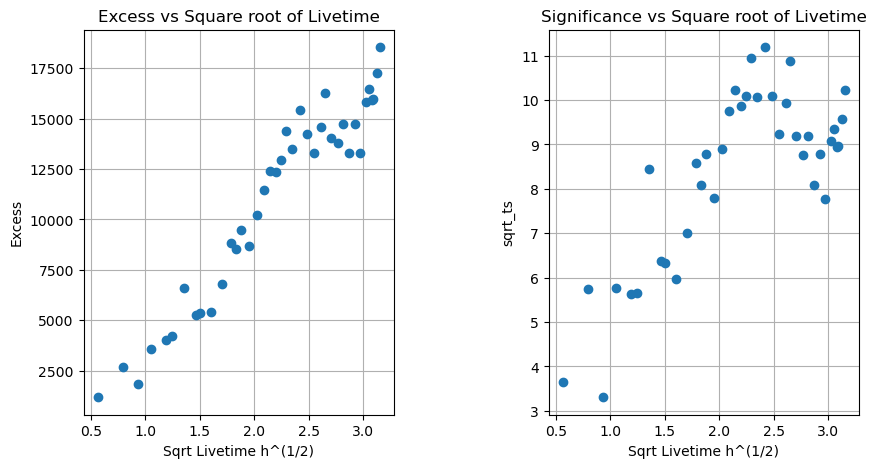

In [41]:
# Plot temporal evolution of excess events and significance value
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(
    np.sqrt(info_table["livetime"].to("h")), info_table["excess"], marker="o", ls="none"
)
plt.plot(info_table["livetime"].to("h")[-1:1], info_table["excess"][-1:1], 'r')
plt.xlabel("Sqrt Livetime h^(1/2)")
plt.ylabel("Excess")
plt.grid()
plt.title('Excess vs Square root of Livetime')

plt.subplot(122)
plt.plot(
    np.sqrt(info_table["livetime"].to("h")),
    info_table["sqrt_ts"],
    marker="o",
    ls="none",
)
plt.grid()
plt.xlabel("Sqrt Livetime h^(1/2)")
plt.ylabel("sqrt_ts")
plt.title('Significance vs Square root of Livetime')
plt.subplots_adjust(wspace=0.5)